In [1]:
#Loading packages
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score 
import datetime as dt
from scipy import stats as sts
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from datetime import datetime as dt
import math
import seaborn as sns


In [2]:
#loading accepted da
data=pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vSLMCETGXVHEisEi-Gk0aEgghySGaK-c127tgfCOc-hzjetTp__XSjZxaU_eMsV0RziuLVXZ6ebLYwy/pub?output=csv",low_memory=False)

In [3]:
#checking first few columns of accpted Malignant
data.head(5).head(5)

,Unnamed: 0,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,37,69,35.092702,101,5.646,1.406607,83.4821,6.796985,82.1000,263.499,1
1,107,46,33.180000,92,5.750,1.304867,18.6900,9.160000,8.8900,209.190,2
2,12,25,22.860000,82,4.090,0.827271,20.4500,23.670000,5.1400,313.730,1
3,72,51,18.370000,105,6.030,1.561770,9.6200,12.760000,3.2100,513.660,2
4,9,75,23.000000,83,4.952,1.013839,17.1270,11.578990,7.0913,318.302,1


In [4]:
#checking column names
from IPython.display import display_html
display(data.info())
display(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
Unnamed: 0        5000 non-null int64
Age               5000 non-null int64
BMI               5000 non-null float64
Glucose           5000 non-null int64
Insulin           5000 non-null float64
HOMA              5000 non-null float64
Leptin            5000 non-null float64
Adiponectin       5000 non-null float64
Resistin          5000 non-null float64
MCP.1             5000 non-null float64
Classification    5000 non-null int64
dtypes: float64(7), int64(4)
memory usage: 429.8 KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
Unnamed: 0        5000 non-null int64
Age               5000 non-null int64
BMI               5000 non-null float64
Glucose           5000 non-null int64
Insulin           5000 non-null float64
HOMA              5000 non-null float64
Leptin            5000 non-null float64
Adiponectin       5000 non-null float64
Resistin          5000 non-null float64
MCP.1             5000 non-null float64
Classification    5000 non-null int64
dtypes: float64(7), int64(4)
memory usage: 429.8 KB


None

In [5]:
#checking missing values 
data.isnull()

,Unnamed: 0,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
4995,False,False,False,False,False,False,False,False,False,False,False
4996,False,False,False,False,False,False,False,False,False,False,False
4997,False,False,False,False,False,False,False,False,False,False,False
4998,False,False,False,False,False,False,False,False,False,False,False


In [6]:
#checking sum of data per column 
data.count().tail()

Leptin            5000
Adiponectin       5000
Resistin          5000
MCP.1             5000
Classification    5000
dtype: int64

In [7]:
#checking percentage of missing data 
data_missing=data.isna()
data_num_missing = data_missing.sum()
data_num_missing*100/len(data)

Unnamed: 0        0.0
Age               0.0
BMI               0.0
Glucose           0.0
Insulin           0.0
HOMA              0.0
Leptin            0.0
Adiponectin       0.0
Resistin          0.0
MCP.1             0.0
Classification    0.0
dtype: float64

In [8]:
#coping data before wrangling to maintain original set incase we want to go back
import copy
data_1=copy.deepcopy(data)

In [9]:
#dropping NA
data.dropna(inplace=True)

In [10]:
#checking shape
data.shape

(5000, 11)

In [11]:
data.describe()

,Unnamed: 0,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000
mean,57.553400,57.269000,27.675695,98.230000,10.253753,2.799148,27.23392,10.146165,15.219034,536.596902,1.552000
std,33.142125,15.999407,4.976360,23.216539,10.346829,3.854780,19.67296,6.741812,13.009221,345.756215,0.497338
min,0.000000,24.000000,18.370000,60.000000,2.432000,0.467409,4.31100,1.656020,3.210000,45.843000,1.000000
25%,29.000000,45.000000,23.010000,86.000000,4.376000,0.960273,12.33100,5.478170,6.892350,270.142000,1.000000
50%,57.000000,55.000000,27.688778,93.000000,6.042000,1.402626,21.21170,8.300955,10.960000,468.786000,2.000000
75%,86.000000,71.000000,31.250000,102.000000,11.910000,2.871792,38.80660,11.900000,19.463240,703.973000,2.000000
max,115.000000,89.000000,38.578759,201.000000,58.460000,25.050342,90.28000,38.040000,82.100000,1698.440000,2.000000


In [12]:
# scikit-learn bootstrap
from sklearn.utils import resample

In [13]:
boot_data = resample(data, replace=True, n_samples=5000, random_state=1)

In [14]:
boot_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 235 to 3853
Data columns (total 11 columns):
Unnamed: 0        5000 non-null int64
Age               5000 non-null int64
BMI               5000 non-null float64
Glucose           5000 non-null int64
Insulin           5000 non-null float64
HOMA              5000 non-null float64
Leptin            5000 non-null float64
Adiponectin       5000 non-null float64
Resistin          5000 non-null float64
MCP.1             5000 non-null float64
Classification    5000 non-null int64
dtypes: float64(7), int64(4)
memory usage: 468.8 KB


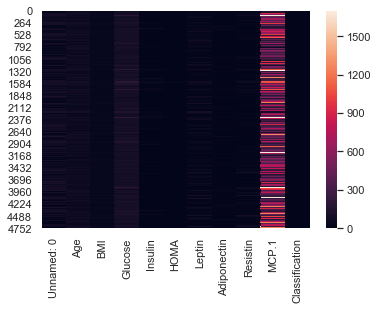

In [15]:
sns.set()
ax = sns.heatmap(data)

In [16]:
#the X variable will take everything expect theClassification, as x is the input and is supposed to match to the correct label
X =boot_data.drop(columns = ["Classification"])
y = boot_data['Classification']

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
import time
import matplotlib.pyplot as plt
import seaborn as sns

Average accuracy of holdout approach:  1.0
Mean Time taken by holdout approach:  0.20421533584594725
-------------------


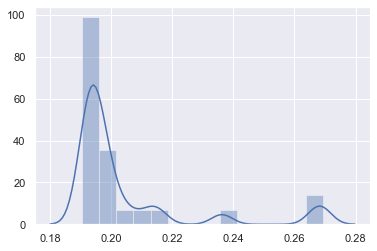

In [18]:
#Random forest using train test split
X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=0.3,random_state=30,stratify=y)
randomforest_split = RandomForestClassifier()

time_holdout = []
score = []
for i in range(25):
  #time.time() is used to calculate the time taken for the model to run
  start_holdout = time.time()
  #trains the random forest using cross validation
  randomforest_split.fit(X = X_train, y = y_train)
  score.append(randomforest_split.score(X_test, y_test))
  
  end_holdout = time.time()
  time_holdout.append(end_holdout - start_holdout)
    
print("Average accuracy of holdout approach: ",np.mean(score))
print('Mean Time taken by holdout approach: ' ,np.mean(time_holdout))
print('-------------------')
sns.distplot(time_holdout)
plt.show()

Average accuracy of cross validation approach:  1.0
Mean Time taken by cross validation approach:  1.7583982753753662
-------------------


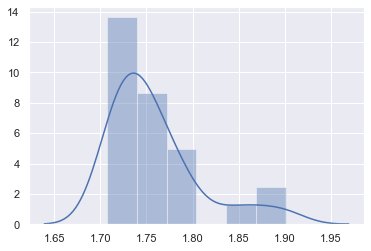

In [19]:
randomforest = RandomForestClassifier()

time_cv = []
for i in range(25):
  #time.time() is used to calculate the time taken for the model to run
  start_cv = time.time()
  #trains the random forest using cross validation
  cv_score = cross_val_score(randomforest, X, y, cv=8)
  end_cv = time.time()
  time_cv.append(end_cv - start_cv)

print("Average accuracy of cross validation approach: ",np.mean(cv_score))
print('Mean Time taken by cross validation approach: ' ,np.mean(time_cv))
print('-------------------')
sns.distplot(time_cv)
plt.show()

In [20]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

Average accuracy of holdout approach:  0.9179999999999999
Mean Time taken by holdout approach:  0.0034375762939453124
-------------------


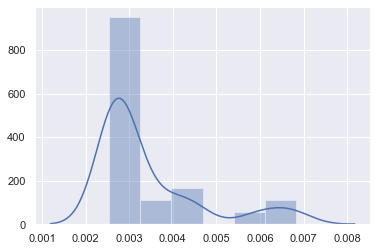

In [21]:
#applying the Naive bayes classification model
gnb = GaussianNB()
time_cv = []
score = []
for i in range(25):
  # calculating time taken for model to run
  start_cv = time.time()
  #training random forest using cross validation
  gnb.fit(X = X_train, y = y_train)
  score.append(gnb.score(X_test, y_test))
  #cv_score = cross_val_score(randomforest_split, X, y, cv=8)
  end_cv = time.time()
  time_cv.append(end_cv - start_cv)
    
print("Average accuracy of holdout approach: ",np.mean(score))
print('Mean Time taken by holdout approach: ' ,np.mean(time_cv))
print('-------------------')
sns.distplot(time_cv)
plt.show()

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, precision_score, accuracy_score, recall_score, roc_auc_score
logRegr = LogisticRegression(max_iter=10000)
logRegr.fit(X_train, y_train)

#  predictions using test set
preds = logRegr.predict(X_test)

In [23]:
#Evaluating performance
print("The accuracy of the model is %.3f" %accuracy_score(y_test, preds)) 
print("The recall of the model  is %.3f" % recall_score(y_test, preds))
print("The precision of the model is  is %.3f" % precision_score(y_test, preds))

The accuracy of the model is 1.000
The recall of the model  is 1.000
The precision of the model is  is 1.000


In [24]:
# no skill prediction probability
probs = [0 for _ in range(len(y_test))]

In [25]:
# probabilities for positive outcomes
reg_probs = logRegr.predict_proba(X_test)[:, 1]